# Test Example: Reqression
This example investigates how linear regression learns a model from data.  
This example also shows effect of changin model capacity in overfitting and under fitting  
This example is based on chapter 5 of Deep Learning book written by Goodfellow and Bengio  
author: ebrahim.soroush@gmail.com

In [372]:
import numpy as np
from scipy.misc import factorial
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

Define unknow function for regression:  
```math
f = a[0] * x^2 + b[1] * x + b[0]
```

In [373]:
def fcn(x, a):
    '''
    custom polynomial function for generating unknown data.
    x: input data
    a: polynomial coefficients
    \NOTE x should be one dimentional
    '''
    return np.sum([np.power(x, i)*a[len(a)-1-i] for i in range(len(a))], axis=0)
def make_ploynomial(x, n):
    '''
    This function prepares polynomial data given its degree: a_n * x^n + ... a_1 * x + a_0
    x: input data
    n: degree of polynomial
    return: numpy array of [a_n, ..., a_1, a_0] coefficients
    '''
    return np.array([np.power(x, n-1-i) for i in range(n)]).T.reshape(-1, n)

Preparing data

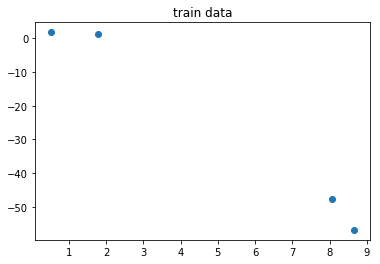

In [384]:
x = 10*np.random.rand(5, 1)
a = [-1, 2, 1]
y = fcn(x, a)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
capacities = [2, 3, 6]
titles = ["underfit", "optimal", "overfit"]
plt.scatter(x_train, y_train)
plt.title("train data")

Now lets solve equition $`y=a*x+b`$ with MSE cost function  
According to Eq 5.12:
```math
w = (x_train.T * x_train)^-1*x_train.T*y_train
```

For capaicty: 2, loss is: 7.1327052695127655
polynomial coefficients: [-7.38327956  9.74742205]
For capaicty: 3, loss is: 4.823841236326029e-13
polynomial coefficients: [-1.  2.  1.]
For capaicty: 6, loss is: 63.205312244741386
polynomial coefficients: [-0.02148438  0.3359375  -1.50390625  0.          2.5         1.        ]


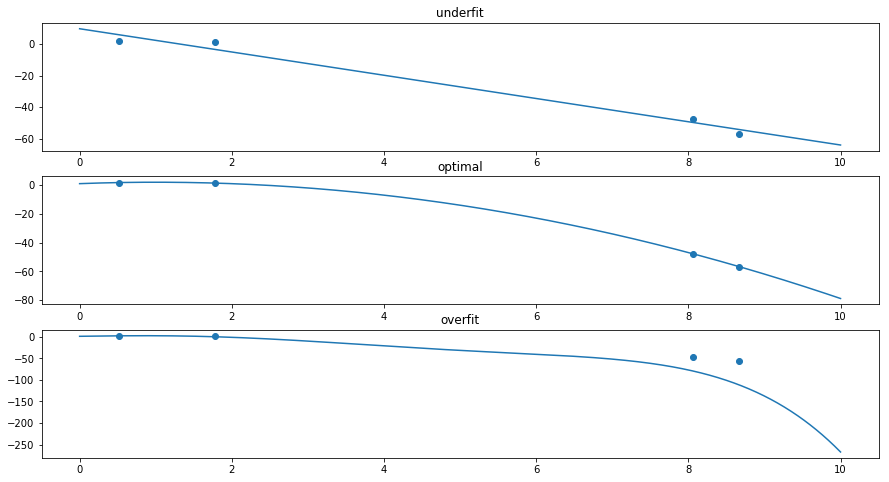

In [385]:
Y = y_train.reshape(-1, 1)
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots(3, figsize=(15, 8))
for index, capacity in enumerate(capacities):
    X = make_ploynomial(x_train, capacity)
    w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, Y))
    loss = np.linalg.norm(np.dot(X,w)-y_train)
    print("For capaicty: {}, loss is: {}".format(capacity, loss))
    print("polynomial coefficients: {}".format(w.flatten()))
    ax[index].set_title(titles[index])
    ax[index].scatter(x_train, y_train)
    ax[index].plot(x, np.dot(make_ploynomial(x, capacity), w))

Linear regression using sklearn library

7.1327052695127646

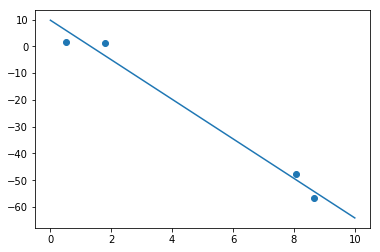

In [386]:
lr = LinearRegression(fit_intercept=True)
lr.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))

plt.scatter(x_train, y_train)
plt.plot(x, lr.predict(x.reshape(-1, 1)))
np.linalg.norm(lr.predict(x_train.reshape(-1, 1))-y_train)

Linear regression using gradient descent  
Given MSE cost function:
```math
J = ||X*w - Y_train||
```
we can deduce derivative of W_i as follow:
``` math
dj/dw_i = facrorial(i) * x^i * (X*w - Y_train)
```

loss in epoch 0 is 187.061
loss in epoch 4000 is 152.757
loss in epoch 8000 is 152.757
loss in epoch 12000 is 152.757
loss in epoch 16000 is 152.757
for capacity 2, loss is: 152.756589
polynomial coefficients: [-7.38327956  9.74742205]
loss in epoch 0 is 149.272
loss in epoch 4000 is 152.077
loss in epoch 8000 is 152.881
loss in epoch 12000 is 153.243
loss in epoch 16000 is 153.403
for capacity 3, loss is: 153.471522
polynomial coefficients: [-0.93990646  1.4236408   1.60711902]
loss in epoch 0 is 32138.726
loss in epoch 4000 is 261.286
loss in epoch 8000 is 260.803
loss in epoch 12000 is 260.321
loss in epoch 16000 is 259.842
for capacity 6, loss is: 259.364774
polynomial coefficients: [-0.03287856  0.16166197  0.78252857  0.89371749  0.38470284  0.89196709]


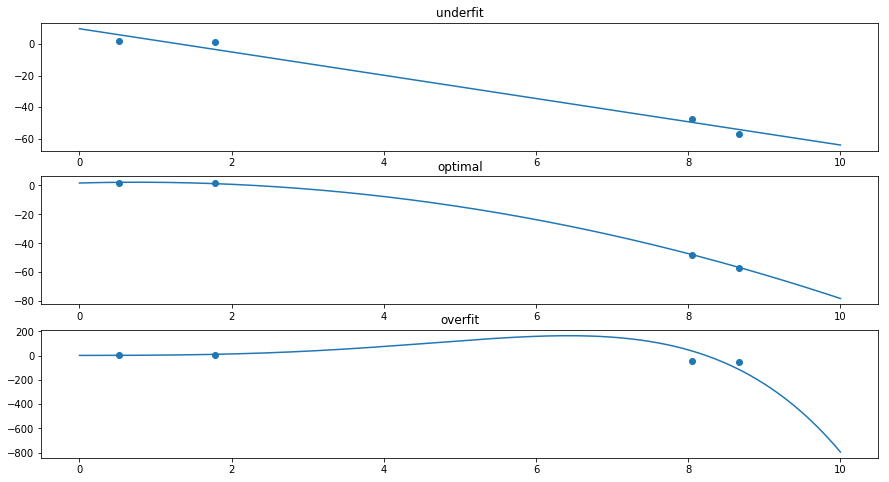

In [389]:
N = float(x_train.shape[0])
total_epoch = 20000
fig, ax = plt.subplots(3, figsize=(15, 8))
learningRates = [2e-2, 1e-4, 1e-12]
for index, capacity in enumerate(capacities):
    learningRate = learningRates[index]
    w = np.random.rand(capacity, 1)
    X = make_ploynomial(x_train, capacity)
    for epoch in range(total_epoch):
        y_t = (np.dot(X, w) - y_train)
        W_grad = 2/(N)*np.sum(np.hstack([np.power(x_train, i) * factorial(i) * y_t for i in range(w.shape[0] - 1,-1, -1)]), axis=0).reshape(w.shape)
        w -= learningRate * W_grad
        loss = np.linalg.norm(np.dot(X, w).squeeze() - y_train)
        if epoch %  int(total_epoch/5) == 0:
            print("loss in epoch %d is %.3f"%(epoch, loss))
            if(loss < 0.01):
                break
    print("for capacity %d, loss is: %f"%(capacity, loss))
    print("polynomial coefficients: {}".format(w.flatten().astype(float)))
    ax[index].set_title(titles[index])
    ax[index].scatter(x_train, y_train)
    ax[index].plot(x, np.dot(make_ploynomial(x, capacity), w))
    

